In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import seaborn as sns
import geopandas as gpd
import contextily as cx
from PIL import Image
from matplotlib.ticker import FormatStrFormatter

from PlotsForPaper_Functions import *

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [11]:
def prep_and_plot (df_10mins_fp, df_2hrs_fp):
    # read in data
    df_10mins= pd.read_csv(df_10mins_fp)
    df_2hrs= pd.read_csv(df_2hrs_fp)
    # 
    df_10mins = df_10mins/1000000
    df_2hrs = df_2hrs/1000000
    # Add minutes column
    df_10mins['minute']= list(range(0,len(df_10mins)*10,10))
    df_2hrs['minute']= [x+470 for x in list(range(0,len(df_2hrs)*120,120))]
    # Plot
    
    fig, ax = plt.subplots(ncols=2, figsize= (12,4))

    for number, column in enumerate(df_10mins.columns[:-1]):
          ax[0].plot(df_10mins["minute"], df_10mins[column], color = colors[number]);           

    for number, column in enumerate(df_2hrs.columns[:-1]):
          ax[0].plot(df_2hrs["minute"], df_2hrs[column], color = colors[number]);      
            
    for number, column in enumerate(df_10mins.columns[:-1]):
          ax[1].plot(df_10mins["minute"], df_10mins[column], color = colors[number])
    for number, column in enumerate(df_2hrs.columns[:-1]):
          ax[1].plot(df_2hrs["minute"], df_2hrs[column], color = colors[number])       

    ax[1].set_xlim(0,700)
    ax[0].set_ylabel('Area (km2)')
    ax[1].set_ylabel('Area (km2)')
    ax[0].set_xlabel('Minute')
    ax[1].set_xlabel('Minute');      
    

def prep_and_plot_v2 (ax, title, df_10mins_fp, df_2hrs_fp, methods_key, catchment_name, trim =False):
    
    colors = colors_dict[methods_key]
    
    # read in data
    df_10mins= pd.read_csv(df_10mins_fp)
    df_2hrs= pd.read_csv(df_2hrs_fp)
    # 
    df_10mins = df_10mins/1000000
    df_2hrs = df_2hrs/1000000
    # Add minutes column
    df_10mins['minute']= list(range(0,len(df_10mins)*10,10))
    df_2hrs['minute']= [x+470 for x in list(range(0,len(df_2hrs)*120,120))]
    
    # Plot
    for number, column in enumerate(df_10mins.columns[:-1]):
        ax.plot(df_10mins["minute"], df_10mins[column], color = colors[number])

    for number, column in enumerate(df_2hrs.columns[:-1]):
        ax.plot(df_2hrs["minute"], df_2hrs[column], color = colors[number])  

    if trim== True:
        ax.set_xlim(0,1400)
    if ax ==axs[0]:
        ax.set_ylabel('Area (km2)', fontsize=15)
    ax.set_xlabel('Minute', fontsize=15)
    ax.set_title(title, fontsize=18)
    ax.tick_params(axis='both', which='major', labelsize=13)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
#     fig.suptitle(catchment_name, fontsize =20, y=1.05)

In [4]:
import sys
sys.path.append("../ProcessModelResults/")
from my_functions import *

In [5]:
methods_dict = {'Idealised': ['6h_sp_fl_0.1', '6h_sp_fl_0.2', '6h_sp_fl_0.3', '6h_sp_fl_0.4','6h_sp_c_0.5',
          '6h_sp_bl_0.6','6h_sp_bl_0.7','6h_sp_bl_0.8','6h_sp_bl_0.9'],
                'Observed':['6h_feh_singlepeak', '6h_c1','6h_c2','6h_c3','6h_c4', '6h_c5', '6h_c6','6h_c7',
             '6h_c8','6h_c9','6h_c10', '6h_c11', '6h_c12','6h_c13','6h_c14','6h_c15'], 
               'SinglePeak_Scaled':['6h_sp_+0%','6h_sp_+5%','6h_sp_+10%','6h_sp_+15%','6h_sp_+20%']}

In [6]:
colors_dict = {'Observed': ["black", "darkblue","indianred","paleturquoise","darkred","darkred","grey","darkred","darkblue","grey","paleturquoise","paleturquoise","indianred","grey","indianred","darkblue"],
              'Idealised':['darkblue', 'darkblue', 'lightblue', 'lightblue', 'grey','indianred','indianred','darkred','darkred' ]}


colors_dict = {'Observed': ["black", "darkblue","indianred","paleturquoise","darkred","darkred","grey","darkred","darkblue","grey","paleturquoise","paleturquoise","indianred","grey","indianred","darkblue"],
              'Idealised':['darkblue', 'darkblue', 'lightblue', 'lightblue', 'grey','indianred','indianred','darkred','darkred' ]}

# linestyles_dict = {'Observed':["black", "solid", "indianred","dotted","darkred","darkred","grey","darkred","dashed",
#                             "grey","paleturquoise","deepskyblue","indianred","grey","indianred","blue"],}

linestyles_dict = {'Observed':["solid", "solid", "solid","solid","solid","solid","solid","solid","solid",
                            "solid","solid","solid","solid","solid","solid","solid"],}


linewidths_dict = {'Observed':[3,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.5],}

## Plot catchments

In [6]:
catchment_name = 'LinDyke'
methods_key = 'Idealised'
colors = colors_dict[methods_key]

### All areas flooded to any depth

In [8]:
# test = pd.read_csv("Data/FloodedAreaOverTime/{}/{}/allvalues_10mins.csv".format('WykeBeck', methods_key))
# test['minute']= list(range(0,len(test)*10,10))
# test

In [9]:
# prep_and_plot ("Data/FloodedAreaOverTime/{}/{}/notwater_10mins.csv".format(catchment_name, methods_key),
#              "Data/FloodedAreaOverTime/{}/{}/notwater_2hrs.csv".format(catchment_name, methods_key)  )      

In [10]:
# prep_and_plot ("Data/FloodedAreaOverTime/{}/{}/allvalues_10mins.csv".format(catchment_name, methods_key),
#              "Data/FloodedAreaOverTime/{}/{}/allvalues_2hrs.csv".format(catchment_name, methods_key)  )      

In [11]:
# prep_and_plot ("Data/FloodedAreaOverTime/{}/{}/nowetlands2_over10_10mins.csv".format(catchment_name, methods_key),
#              "Data/FloodedAreaOverTime/{}/{}/nowetlands_over10_2hrs.csv".format(catchment_name, methods_key)  )      

### Areas with flooding that aren't permanent water

In [12]:
# prep_and_plot ("Data/FloodedAreaOverTime/{}/{}/notwater_10mins.csv".format(catchment_name, methods_key),
#              "Data/FloodedAreaOverTime/{}/{}/notwater_2hrs.csv".format(catchment_name, methods_key)  )      

In [13]:
# prep_and_plot ("Data/FloodedAreaOverTime/{}/{}/urban_10mins.csv".format(catchment_name, methods_key),
#              "Data/FloodedAreaOverTime/{}/{}/urban_2hrs.csv".format(catchment_name, methods_key))   

### Areas with flooding >0.1m

In [14]:
# prep_and_plot ("Data/FloodedAreaOverTime/{}/{}/over10cm_10mins.csv".format(catchment_name, methods_key),
#              "Data/FloodedAreaOverTime/{}/{}/over10cm_2hrs.csv".format(catchment_name, methods_key)  )      

### Kippax - this is just a repeat of Garforth rn

In [15]:
# if catchment_name == 'LinDyke':
#     prep_and_plot ("Data/FloodedAreaOverTime/{}/{}/kippax_10mins.csv".format(catchment_name, methods_key),
#                  "Data/FloodedAreaOverTime/{}/{}/kippax_2hrs.csv".format(catchment_name, methods_key))      
#     prep_and_plot ("Data/FloodedAreaOverTime/{}/{}/kippax_over10_10mins.csv".format(catchment_name, methods_key),
#                  "Data/FloodedAreaOverTime/{}/{}/kippax_over10_2hrs.csv".format(catchment_name, methods_key))      

### Garforth -

In [16]:
# if catchment_name == 'LinDyke':
#     prep_and_plot ("Data/FloodedAreaOverTime/{}/{}/garforth_10mins.csv".format(catchment_name, methods_key),
#                  "Data/FloodedAreaOverTime/{}/{}/garforth_2hrs.csv".format(catchment_name, methods_key))   
#     prep_and_plot ("Data/FloodedAreaOverTime/{}/{}/garforth_over10_10mins.csv".format(catchment_name, methods_key),
#                  "Data/FloodedAreaOverTime/{}/{}/garforth_over10_2hrs.csv".format(catchment_name, methods_key))      

### Urban

In [17]:
# prep_and_plot ("Data/FloodedAreaOverTime/{}/{}/urban_10mins.csv".format(catchment_name, methods_key),
#              "Data/FloodedAreaOverTime/{}/{}/urban_2hrs.csv".format(catchment_name, methods_key))   

## Plot together

### Wyke Beck - Idealised

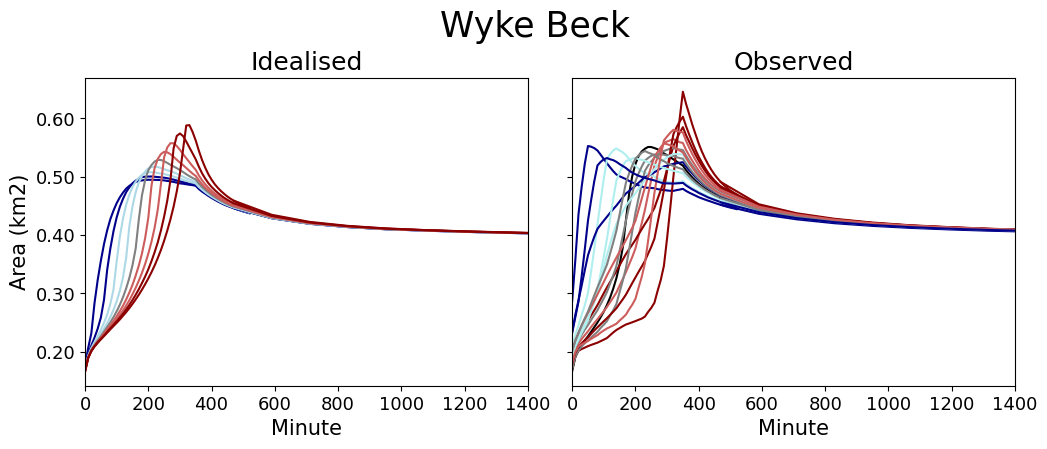

In [18]:
fig, axs = plt.subplots(ncols=2, figsize= (12,4), sharey= True, gridspec_kw={'wspace':0.1})
# Idealised
prep_and_plot_v2(axs[0], 'Idealised', "Data/FloodedAreaOverTime/{}/{}/notwater_10mins.csv".format('WykeBeck', 'Idealised'),
             "Data/FloodedAreaOverTime/{}/{}/notwater_2hrs.csv".format('WykeBeck', 'Idealised'), 'Idealised', 'Wyke Beck', True)      
# Observed
prep_and_plot_v2(axs[1], 'Observed', "Data/FloodedAreaOverTime/{}/{}/notwater_10mins.csv".format('WykeBeck', 'Observed'),
             "Data/FloodedAreaOverTime/{}/{}/notwater_2hrs.csv".format('WykeBeck', 'Observed'), 'Observed',  'Wyke Beck', True)  

fig.suptitle("Wyke Beck", fontsize=25, y=1.05);

fig.savefig("Figs/FloodedAreaOverTime/WykeBeck_FloodedAreaOverTime.PNG", bbox_inches = 'tight')

### Lin Dyke

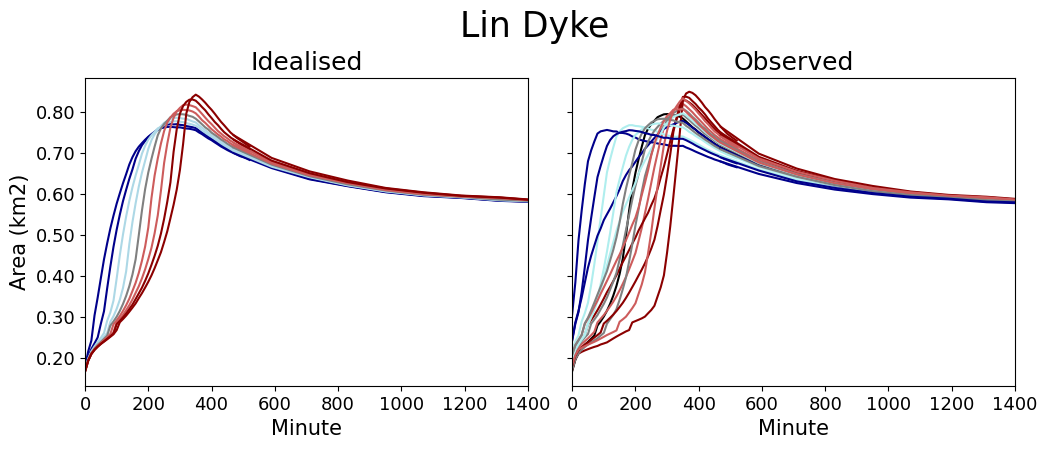

In [21]:
fig, axs = plt.subplots(ncols=2, figsize= (12,4), sharey= True, gridspec_kw={'wspace':0.1})
# Not wetlands, not water
prep_and_plot_v2(axs[0], 'Idealised', "Data/FloodedAreaOverTime/{}/{}/nowetlands_nopermwater_over10_10mins.csv".format('LinDyke', 'Idealised'),
             "Data/FloodedAreaOverTime/{}/{}/nowetlands_nopermwater_over10_2hrs.csv".format('LinDyke', 'Idealised'), 'Idealised', 'LinDyke', True)      
# Urban
prep_and_plot_v2(axs[1], 'Observed', "Data/FloodedAreaOverTime/{}/{}/nowetlands_nopermwater_over10_10mins.csv".format('LinDyke', 'Observed'),
             "Data/FloodedAreaOverTime/{}/{}/nowetlands_nopermwater_over10_2hrs.csv".format('LinDyke', 'Observed'), 'Observed', 'LinDyke', True)  
fig.suptitle("Lin Dyke", fontsize=25, y=1.05);

fig.savefig("Figs/FloodedAreaOverTime/LinDyke_FloodedAreaOverTime.PNG", bbox_inches = 'tight')

### Find difference in peak

In [21]:
def find_diff_in_peak_intensity(fp, least_fl, most_bl):
    df_10mins= pd.read_csv(fp)
    df_10mins['minute']= list(range(0,len(df_10mins)*10,10))
    fl = df_10mins[['minute', least_fl]] #350mins
    bl = df_10mins[['minute', most_bl]] #400mins
    print(round(fl[fl[least_fl] == fl[least_fl].max()][least_fl].values[0]/bl[bl[most_bl] == bl[most_bl].max()][most_bl].values[0],2), '%')
    
    fl_peak_min = fl[fl[least_fl]==fl[least_fl].max()]['minute'].values[0]
    bl_peak_min  = bl[bl[most_bl]==bl[most_bl].max()]['minute'].values[0]
    print(fl_peak_min, bl_peak_min)


## Wyke Beck, Idealised

In [177]:
print("Not Water")
find_diff_in_peak_intensity("Data/FloodedAreaOverTime/{}/{}/notwater_10mins.csv".format('WykeBeck', 'Idealised'),
                           '6h_sp_fl_0.1', "6h_sp_bl_0.9")
print("Urban")
find_diff_in_peak_intensity("Data/FloodedAreaOverTime/{}/{}/urban_10mins.csv".format('WykeBeck', 'Idealised'),
                           '6h_sp_fl_0.1', "6h_sp_bl_0.9")

Not Water
0.84 %
200 330
Urban
0.83 %
170 320


## Lin Dyke, Idealised

In [23]:
print("Not water")
find_diff_in_peak_intensity("Data/FloodedAreaOverTime/{}/{}/nowetlands_nopermwater_over10_10mins.csv".format('LinDyke', 'Idealised'),
                           '6h_sp_fl_0.1', "6h_sp_bl_0.9")

print("Urban")
find_diff_in_peak_intensity("Data/FloodedAreaOverTime/{}/{}/urban_10mins.csv".format('LinDyke', 'Idealised'),
                           '6h_sp_fl_0.1', "6h_sp_bl_0.9")

Not water
0.91 %
270 350
Urban
0.87 %
210 330


### Lin Dyke, observed

In [24]:
print("Not water")
find_diff_in_peak_intensity("Data/FloodedAreaOverTime/{}/{}/nowetlands_nopermwater_over10_10mins.csv".format('LinDyke', 'Observed'),
                           '6h_c1', "6h_c5")
find_diff_in_peak_intensity("Data/FloodedAreaOverTime/{}/{}/nowetlands_nopermwater_over10_10mins.csv".format('LinDyke', 'Observed'),
                           '6h_c8', "6h_c5")

Not water
0.89 %
110 370
0.92 %
350 370


In [25]:
print("Not water")
find_diff_in_peak_intensity("Data/FloodedAreaOverTime/{}/{}/notwater_10mins.csv".format('WykeBeck', 'Observed'),
                           '6h_c1', "6h_c5")
find_diff_in_peak_intensity("Data/FloodedAreaOverTime/{}/{}/notwater_10mins.csv".format('WykeBeck', 'Observed'),
                           '6h_c8', "6h_c5")

Not water
0.86 %
50 350
0.81 %
350 350
